# Preview Data
Ce notebook a pour objectif de pré-visualiser les données des utilisateurs sous différents « angles » afin de mieux les comprendre ou de faire ressortir des facteurs de compréhension de la problématique.

Par la même occasion, nous étudierons les différentes corrélations entre les attributs.

In [5]:
import pymongo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import clear_output, display

In [6]:
client = pymongo.MongoClient("mongodb://localhost:27017")
db = client["Tweet"]
user_collection = db["users"]

In [7]:
users = list(user_collection.find({}))
users = pd.DataFrame(users)
users = users.drop(columns=["_id","user_id","last_tweet_published_id","tweet_ids","friends_count","followers_count"])

## Distribution des variables

In [8]:
users.describe()

,hashtag_frequency,verified,statuses_count,favourites_count,age_account,ratio_friends_followers,avg_tweet_length,tweet_frequency,nb_sensitive_tweets,Ap,visibility,ratio_sensitive_tweets,ratio_punctuation_tweets
count,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06
mean,5.952305e-02,9.807756e-03,1.985581e-03,5.093716e-03,9.806041e-02,2.198457e-03,2.431186e-01,4.314789e-03,1.256115e-04,4.325031e-03,1.539910e-01,9.341535e-03,7.798288e-02
std,5.663139e-02,9.854729e-02,4.547736e-03,1.282194e-02,5.866958e-02,4.340085e-03,7.733582e-02,1.068666e-02,2.744774e-03,1.069806e-02,9.819461e-02,9.089836e-02,4.253557e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e-02,0.000000e+00,1.240187e-04,2.577807e-04,4.612570e-02,9.981801e-04,1.941032e-01,4.122034e-04,0.000000e+00,4.174564e-04,7.558016e-02,0.000000e+00,4.809343e-02
50%,4.000000e-02,0.000000e+00,5.844829e-04,1.259227e-03,1.041309e-01,1.294535e-03,2.555283e-01,1.412616e-03,0.000000e+00,1.420996e-03,1.329816e-01,0.000000e+00,7.069943e-02
75%,8.000000e-02,0.000000e+00,2.009013e-03,4.609794e-03,1.459279e-01,2.145840e-03,3.206388e-01,4.214512e-03,0.000000e+00,4.226436e-03,1.903830e-01,0.000000e+00,1.019763e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.510615e+00,1.000000e+00,1.000000e+00


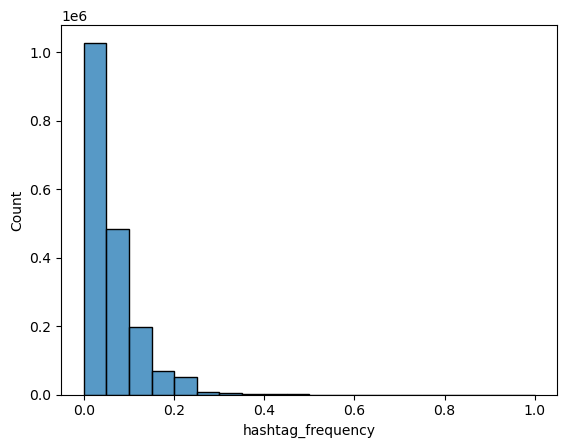

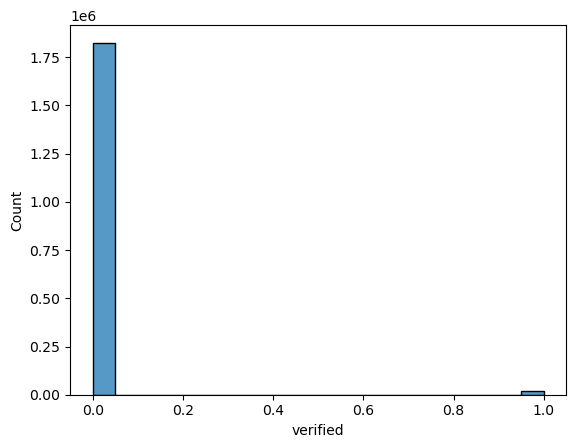

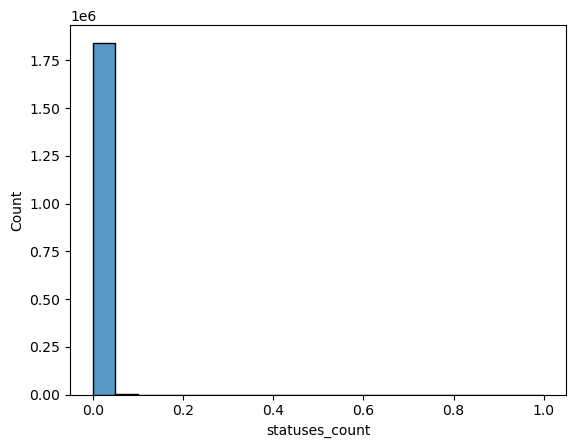

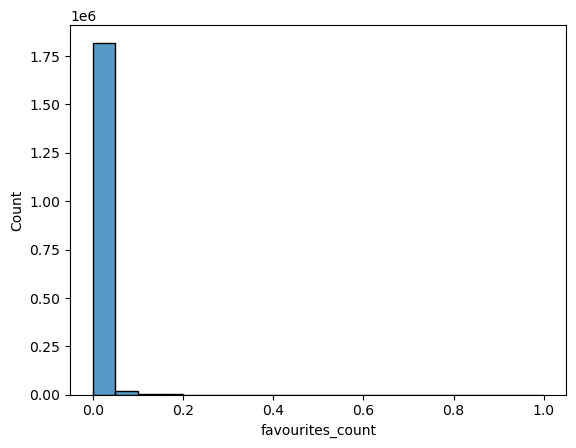

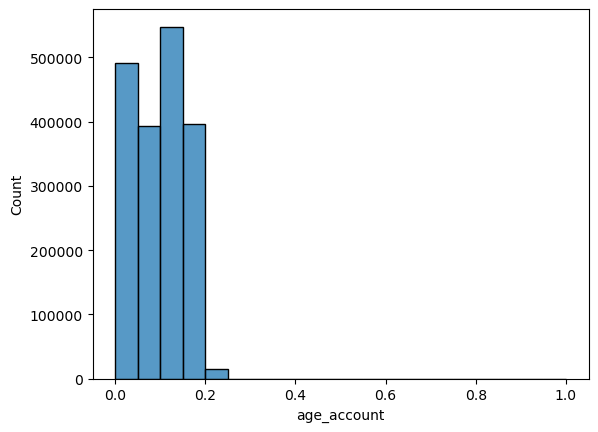

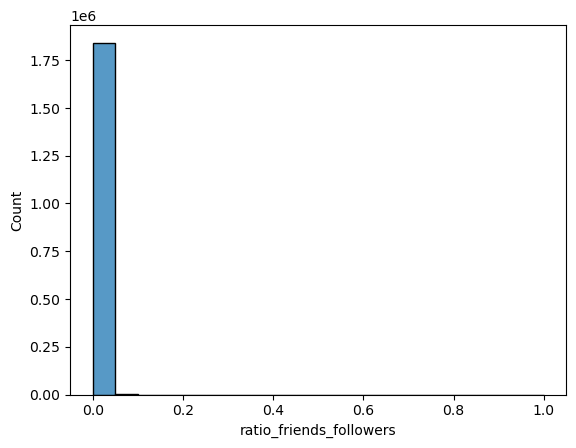

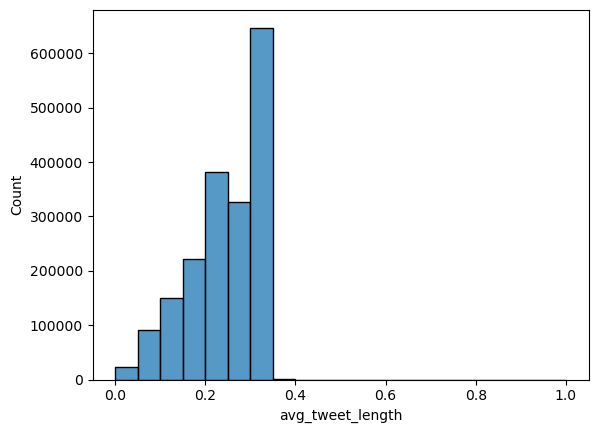

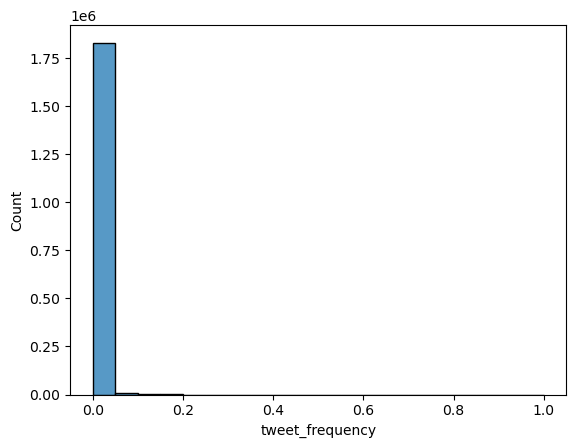

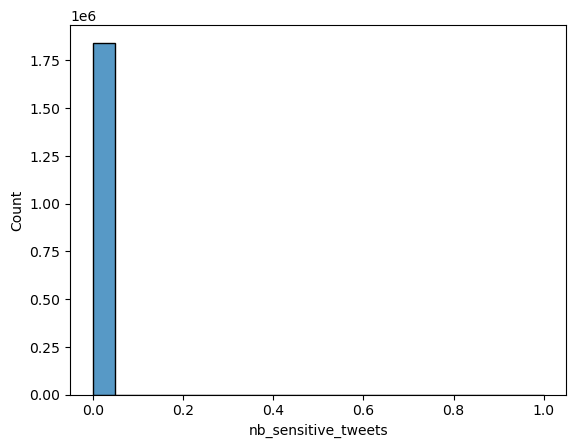

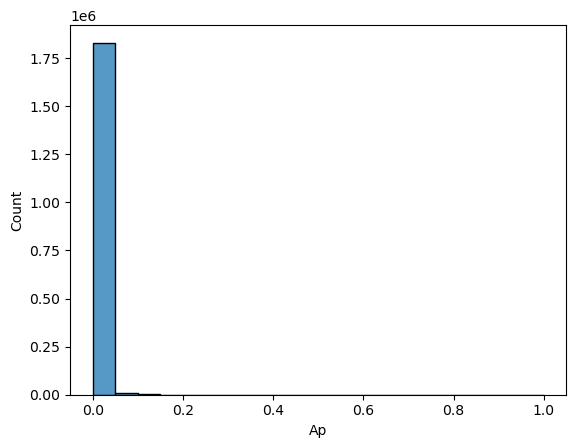

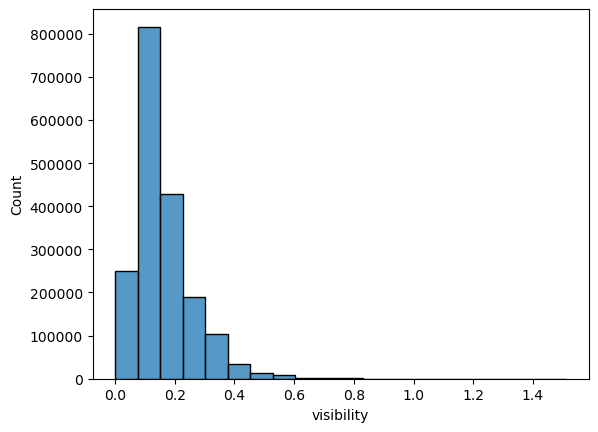

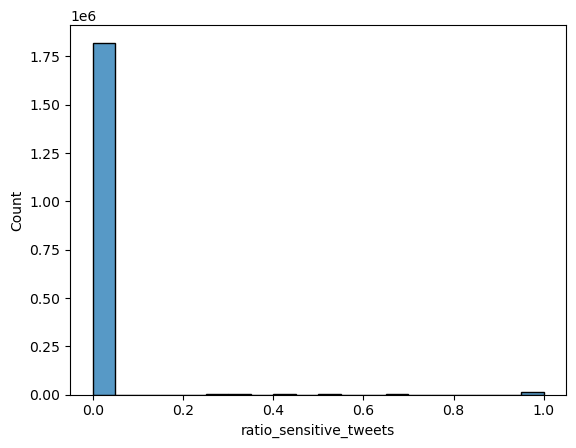

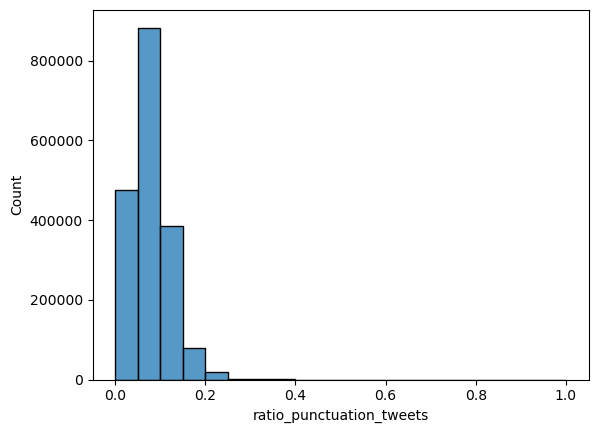

In [9]:
for col in users.columns:
    sns.histplot(users[col], bins=20)
    plt.show()

In [10]:
def print_occurences(new_value):
    attribute = new_value['new']
    clear_output()
    display(dropdown)
    print('>>>>>>>>>> COLUMN : ', attribute, ' <<<<<<<<<<')
    print('Cela peut prendre du temps en fonction des attributs.')
    counts = users[attribute].value_counts()
    counts_df = pd.DataFrame({'Valeur': counts.index, 'Occurrences': counts.values})
    print(counts_df.sort_values('Occurrences', ascending=False).to_string(index=False))

In [11]:
dropdown = widgets.Dropdown(options=users.columns)
dropdown.observe(print_occurences, names='value')
dropdown

Dropdown(options=('hashtag_frequency', 'verified', 'statuses_count', 'favourites_count', 'age_account', 'ratio…

>>>>>>>>>> COLUMN :  hashtag_frequency  <<<<<<<<<<
Cela peut prendre du temps en fonction des attributs.
  Valeur  Occurrences
0.040000       496898
0.000000       409118
0.080000       292759
0.120000       134159
0.160000        58852
0.060000        58807
0.020000        48934
0.200000        29753
0.100000        24892
0.053333        20679
0.240000        17783
0.066667        17319
0.026667        15819
0.050000         9327
0.140000         9212
0.093333         9077
0.013333         8834
0.070000         7260
0.030000         6842
0.106667         6475
0.280000         6012
0.048000         4775
0.056000         4755
0.320000         4452
0.090000         4396
0.064000         4309
0.072000         3830
0.032000         3511
0.180000         3458
0.133333         3064
0.046667         2706
0.110000         2344
0.088000         2326
0.024000         2242
0.010000         2073
0.146667         2028
0.073333         2007
0.360000         1966
0.033333         1950
0.096000       